### Advan Research Exploration for Walmarts

In [1]:
import sys
from pathlib import Path
import pyarrow.parquet as pq
import pyarrow.dataset as ds
import re
import pandas as pd

sys.path.append(str(Path.cwd().parent))
from config import PATH_KIOSK_USER_PATTERNS_FOLDER, PATH_KIOSK_USER_PATTERNS_REPO


kupdat03 = ds.dataset(PATH_KIOSK_USER_PATTERNS_FOLDER / "working/processed/kupdat03_advan research monthly patterns", 
    format="parquet", partitioning=["YEAR", "MONTH"])

In [2]:
kupdat03.head(10).to_pandas()

,CITY,DATE_RANGE_END,DATE_RANGE_START,LATITUDE,LOCATION_NAME,LONGITUDE,NAICS_CODE,PLACEKEY,RAW_VISITOR_COUNTS,RAW_VISIT_COUNTS,REGION,STREET_ADDRESS,FILE_NAME,HOME_CBG,VISITOR_COUNT,YEAR,MONTH
0,Longview,2019-02-01 00:00:00.000,2019-01-01,46.119351,Walmart Pharmacy,-122.930115,446110,222-223@5xd-j6x-p5f,3220.0,6827.0,WA,540 7th Ave,data_01bd7440-0105-dcc9-0042-fa0702ed2712_03_1...,530150003001,110,YEAR=2019,MONTH=1
1,Longview,2019-02-01 00:00:00.000,2019-01-01,46.119351,Walmart Pharmacy,-122.930115,446110,222-223@5xd-j6x-p5f,3220.0,6827.0,WA,540 7th Ave,data_01bd7440-0105-dcc9-0042-fa0702ed2712_03_1...,530150009002,73,YEAR=2019,MONTH=1
2,Longview,2019-02-01 00:00:00.000,2019-01-01,46.119351,Walmart Pharmacy,-122.930115,446110,222-223@5xd-j6x-p5f,3220.0,6827.0,WA,540 7th Ave,data_01bd7440-0105-dcc9-0042-fa0702ed2712_03_1...,530150021002,60,YEAR=2019,MONTH=1
3,Longview,2019-02-01 00:00:00.000,2019-01-01,46.119351,Walmart Pharmacy,-122.930115,446110,222-223@5xd-j6x-p5f,3220.0,6827.0,WA,540 7th Ave,data_01bd7440-0105-dcc9-0042-fa0702ed2712_03_1...,530150005021,56,YEAR=2019,MONTH=1
4,Longview,2019-02-01 00:00:00.000,2019-01-01,46.119351,Walmart Pharmacy,-122.930115,446110,222-223@5xd-j6x-p5f,3220.0,6827.0,WA,540 7th Ave,data_01bd7440-0105-dcc9-0042-fa0702ed2712_03_1...,530150005022,55,YEAR=2019,MONTH=1
5,Longview,2019-02-01 00:00:00.000,2019-01-01,46.119351,Walmart Pharmacy,-122.930115,446110,222-223@5xd-j6x-p5f,3220.0,6827.0,WA,540 7th Ave,data_01bd7440-0105-dcc9-0042-fa0702ed2712_03_1...,530150005023,55,YEAR=2019,MONTH=1
6,Longview,2019-02-01 00:00:00.000,2019-01-01,46.119351,Walmart Pharmacy,-122.930115,446110,222-223@5xd-j6x-p5f,3220.0,6827.0,WA,540 7th Ave,data_01bd7440-0105-dcc9-0042-fa0702ed2712_03_1...,530150009004,52,YEAR=2019,MONTH=1
7,Longview,2019-02-01 00:00:00.000,2019-01-01,46.119351,Walmart Pharmacy,-122.930115,446110,222-223@5xd-j6x-p5f,3220.0,6827.0,WA,540 7th Ave,data_01bd7440-0105-dcc9-0042-fa0702ed2712_03_1...,530150017005,45,YEAR=2019,MONTH=1
8,Longview,2019-02-01 00:00:00.000,2019-01-01,46.119351,Walmart Pharmacy,-122.930115,446110,222-223@5xd-j6x-p5f,3220.0,6827.0,WA,540 7th Ave,data_01bd7440-0105-dcc9-0042-fa0702ed2712_03_1...,530150020021,43,YEAR=2019,MONTH=1
9,Longview,2019-02-01 00:00:00.000,2019-01-01,46.119351,Walmart Pharmacy,-122.930115,446110,222-223@5xd-j6x-p5f,3220.0,6827.0,WA,540 7th Ave,data_01bd7440-0105-dcc9-0042-fa0702ed2712_03_1...,530150004005,42,YEAR=2019,MONTH=1


## Unique LOCATION_NAME and counts in kupdat03


In [3]:
# Get unique LOCATION_NAME values and counts of those values without loading the entire dataset
# Use PyArrow to compute counts efficiently
location_counts = kupdat03.scanner(columns=["LOCATION_NAME"]).to_table().group_by("LOCATION_NAME").aggregate([("LOCATION_NAME", "count")]).to_pandas()
location_counts.columns = ["LOCATION_NAME", "COUNT"]
location_counts = location_counts.sort_values("COUNT", ascending=False)

# Display the top results
print(f"Total unique locations: {len(location_counts)}")


location_counts.to_csv(PATH_KIOSK_USER_PATTERNS_REPO/"analysis/kupana03_walmart location names and counts.csv", index=False)

Total unique locations: 2936


In [4]:
location_counts.head(20)

,LOCATION_NAME,COUNT
0,Walmart Pharmacy,34717022
1,Walmart Vision Center,31062566
9,Walmart Photo Center,30712579
8,Walmart Auto Care Center,24814232
4,Walmart Supercenter,18373377
2,Walmart Fuel Station,2280110
3,Walmart Neighborhood Market,1824480
5,Walmart,1596187
7,Walmart Distribution,830694
208,Sunbelt Rentals Inside Walmart,300644


In [5]:
# Select the locations to keep:
selected_locations = ["Walmart Pharmacy","Walmart Supercenter","Walmart","Walmart Center","Walmart Neighborhood Market"]
# Create a regex pattern to match both "Walmart" and "Supercenter" in any order
pattern = re.compile(r'(?=.*Walmart)(?=.*Supercenter)', re.IGNORECASE)

# Filter locations that are in our selected list or match the pattern
def filter_location(loc):
    if loc in selected_locations:
        return True
    # Check if it matches "Walmart" and "Supercenter" in any order
    elif pattern.search(loc):
        return True
    return False

# Get all unique location names from our location_counts dataframe
all_locations = location_counts['LOCATION_NAME'].tolist()

# Apply our filter to get the list of locations to keep
locations_to_keep = [loc for loc in all_locations if filter_location(loc)]

# Print the number of locations that will be kept
print(f"Keeping {len(locations_to_keep)} out of {len(all_locations)} locations")

# Display the first few locations we're keeping
print("Sample locations being kept:")
for loc in locations_to_keep[:10]:
    print(f"  - {loc}")

# Create a filtered dataset with only the selected locations
filtered_kupdat03 = kupdat03.filter(ds.field('LOCATION_NAME').isin(locations_to_keep))

Keeping 2343 out of 2936 locations
Sample locations being kept:
  - Walmart Pharmacy
  - Walmart Supercenter
  - Walmart Neighborhood Market
  - Walmart
  - Walmart Center
  - Walmart Supercenter San Antonio Supercenter
  - Walmart Supercenter Houston Supercenter
  - Walmart Supercenter Jacksonville Supercenter
  - Walmart Supercenter Dallas Supercenter
  - Walmart Supercenter Las Vegas Supercenter


In [6]:
# Count total rows in filtered_kupdat03
row_count = filtered_kupdat03.scanner().count_rows()
print(f"Total rows in filtered_kupdat03: {row_count:,}")

# Get a sample of the data to verify contents
sample_df = filtered_kupdat03.head(5).to_pandas()
print("\nSample data:")
display(sample_df)

Total rows in filtered_kupdat03: 69,277,648

Sample data:


,CITY,DATE_RANGE_END,DATE_RANGE_START,LATITUDE,LOCATION_NAME,LONGITUDE,NAICS_CODE,PLACEKEY,RAW_VISITOR_COUNTS,RAW_VISIT_COUNTS,REGION,STREET_ADDRESS,FILE_NAME,HOME_CBG,VISITOR_COUNT,YEAR,MONTH
0,Longview,2019-02-01 00:00:00.000,2019-01-01,46.119351,Walmart Pharmacy,-122.930115,446110,222-223@5xd-j6x-p5f,3220.0,6827.0,WA,540 7th Ave,data_01bd7440-0105-dcc9-0042-fa0702ed2712_03_1...,530150003001,110,YEAR=2019,MONTH=1
1,Longview,2019-02-01 00:00:00.000,2019-01-01,46.119351,Walmart Pharmacy,-122.930115,446110,222-223@5xd-j6x-p5f,3220.0,6827.0,WA,540 7th Ave,data_01bd7440-0105-dcc9-0042-fa0702ed2712_03_1...,530150009002,73,YEAR=2019,MONTH=1
2,Longview,2019-02-01 00:00:00.000,2019-01-01,46.119351,Walmart Pharmacy,-122.930115,446110,222-223@5xd-j6x-p5f,3220.0,6827.0,WA,540 7th Ave,data_01bd7440-0105-dcc9-0042-fa0702ed2712_03_1...,530150021002,60,YEAR=2019,MONTH=1
3,Longview,2019-02-01 00:00:00.000,2019-01-01,46.119351,Walmart Pharmacy,-122.930115,446110,222-223@5xd-j6x-p5f,3220.0,6827.0,WA,540 7th Ave,data_01bd7440-0105-dcc9-0042-fa0702ed2712_03_1...,530150005021,56,YEAR=2019,MONTH=1
4,Longview,2019-02-01 00:00:00.000,2019-01-01,46.119351,Walmart Pharmacy,-122.930115,446110,222-223@5xd-j6x-p5f,3220.0,6827.0,WA,540 7th Ave,data_01bd7440-0105-dcc9-0042-fa0702ed2712_03_1...,530150005022,55,YEAR=2019,MONTH=1


In [7]:
# Count rows by location type to see distribution
location_distribution = filtered_kupdat03.scanner(columns=["LOCATION_NAME"]).to_table().group_by("LOCATION_NAME").aggregate([("LOCATION_NAME", "count")]).to_pandas()
location_distribution.columns = ["LOCATION_NAME", "COUNT"]
location_distribution = location_distribution.sort_values("COUNT", ascending=False)
display(location_distribution.head(10))

,LOCATION_NAME,COUNT
0,Walmart Pharmacy,34717022
1,Walmart Supercenter,18373377
3,Walmart Neighborhood Market,1824480
2,Walmart,1596187
4,Walmart Center,150905
560,Walmart Supercenter San Antonio Supercenter,125979
24,Walmart Supercenter Houston Supercenter,117977
546,Walmart Supercenter Jacksonville Supercenter,83993
130,Walmart Supercenter Dallas Supercenter,71571
116,Walmart Supercenter Las Vegas Supercenter,54287


In [8]:
# Convert to pandas with necessary columns
filtered_df = filtered_kupdat03.to_table(
    columns=["HOME_CBG", "VISITOR_COUNT", "STREET_ADDRESS", "LATITUDE", "LONGITUDE", "REGION", "YEAR", "MONTH"]
).to_pandas()

# Extract YEAR/MONTH as int
filtered_df["YEAR"] = filtered_df["YEAR"].astype(str).str.extract(r'(\d{4})').astype(int)
filtered_df["MONTH"] = filtered_df["MONTH"].astype(str).str.extract(r'(\d{1,2})').astype(int)

# Filter for Jan 2024, GA
filtered_df = filtered_df[
    (filtered_df["YEAR"] == 2024) &
    (filtered_df["MONTH"] == 1) &
    (filtered_df["REGION"] == "GA")
].copy()

# Ensure numeric
filtered_df["VISITOR_COUNT"] = pd.to_numeric(filtered_df["VISITOR_COUNT"], errors="coerce")

# Aggregate
step1_result = (
    filtered_df.groupby(
        ["HOME_CBG", "STREET_ADDRESS", "LATITUDE", "LONGITUDE"], as_index=False
    )
    .agg({"VISITOR_COUNT": "sum"})
)

print("Step 1 complete. Example rows:")
print(step1_result.head())

Step 1 complete. Example rows:
       HOME_CBG         STREET_ADDRESS   LATITUDE  LONGITUDE  VISITOR_COUNT
0  010010208023         8424 Mall Pkwy  33.694748 -84.084961            5.0
1  010010208024         815 Shugart Rd  34.786706 -84.999151            7.0
2  010010208024         815 Shugart Rd  34.787157 -84.998561            7.0
3  010030103002  101 Market Place Blvd  34.203019 -84.787649            6.0
4  010030103002  101 Market Place Blvd  34.203030 -84.787661            6.0


In [9]:
import pyarrow.dataset as ds
import pandas as pd

# Load the "home panel summary" Parquet dataset
kupdat03_hps = ds.dataset(
    PATH_KIOSK_USER_PATTERNS_FOLDER / "working/processed/kupdat03_advan research home panel summary",
    format="parquet",
    partitioning=["YEAR", "MONTH"]
)

# Read only the needed columns for memory efficiency
home_panel_df = kupdat03_hps.to_table(
    columns=["CENSUS_BLOCK_GROUP", "NUMBER_DEVICES_RESIDING", "REGION", "YEAR", "MONTH"]
).to_pandas()

# Fix YEAR and MONTH columns if necessary 
if home_panel_df["YEAR"].dtype == object and home_panel_df["YEAR"].str.contains("YEAR=").any():
    home_panel_df["YEAR"] = home_panel_df["YEAR"].str.extract(r'(\d+)').astype(int)
if home_panel_df["MONTH"].dtype == object and home_panel_df["MONTH"].str.contains("MONTH=").any():
    home_panel_df["MONTH"] = home_panel_df["MONTH"].str.extract(r'(\d+)').astype(int)

# Filter for January 2024, Georgia
filtered_home_panel = home_panel_df[
    (home_panel_df["YEAR"] == 2024) &
    (home_panel_df["MONTH"] == 1) &
    (home_panel_df["REGION"] == "GA")
].copy()

# Make sure device count column is numeric
filtered_home_panel["NUMBER_DEVICES_RESIDING"] = pd.to_numeric(filtered_home_panel["NUMBER_DEVICES_RESIDING"], errors="coerce")

# Aggregate to one row per CBG (CENSUS_BLOCK_GROUP)
step2_result = (
    filtered_home_panel
    .groupby("CENSUS_BLOCK_GROUP", as_index=False)
    .agg({"NUMBER_DEVICES_RESIDING": "sum"})
)

print("Step 2 complete. Example rows:")
print(step2_result.head())
print("Number of unique CBGs:", step2_result['CENSUS_BLOCK_GROUP'].nunique())
print("Number of rows in output:", len(step2_result))

Step 2 complete. Example rows:
  CENSUS_BLOCK_GROUP  NUMBER_DEVICES_RESIDING
0       130019501001                     48.0
1       130019501002                    134.0
2       130019502001                     85.0
3       130019502002                     87.0
4       130019502003                     58.0
Number of unique CBGs: 5529
Number of rows in output: 5529


/var/folders/5c/j1qyt58n48724qt7xyp0z9140000gn/T/ipykernel_80422/2792356659.py:49: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


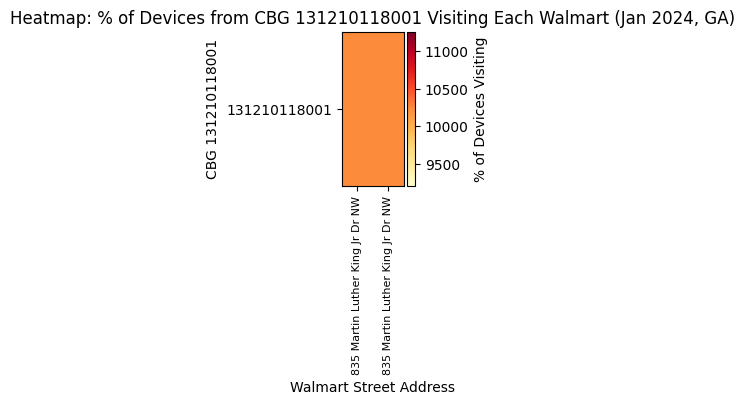

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# --- Step 1: Aggregate visitor counts by CBG and Walmart ---
step1_result = (
    filtered_df.groupby(
        ["HOME_CBG", "STREET_ADDRESS", "LATITUDE", "LONGITUDE"], as_index=False
    )
    .agg({"VISITOR_COUNT": "sum"})
)

# --- Step 2: Aggregate home panel device counts by CBG ---
step2_result = (
    filtered_home_panel
    .groupby("CENSUS_BLOCK_GROUP", as_index=False)
    .agg({"NUMBER_DEVICES_RESIDING": "sum"})
)

# --- Step 3: Merge the two datasets on CBG ---
merged = step1_result.merge(
    step2_result,
    left_on='HOME_CBG',
    right_on='CENSUS_BLOCK_GROUP',
    how='inner'
)

# --- Step 4: Pick a random CBG or specify one ---
random_cbg = random.choice(merged['HOME_CBG'].unique())
cbg_id = random_cbg   # You can manually set cbg_id = 'your_cbg_here' if you want a specific one

# --- Step 5: Calculate % visiting for each Walmart ---
cbg_visits = merged[merged['HOME_CBG'] == cbg_id].copy()
cbg_visits['PERCENTAGE_VISITED'] = (cbg_visits['VISITOR_COUNT'] / cbg_visits['NUMBER_DEVICES_RESIDING']) * 100

# --- Step 6: Prepare matrix for heatmap (1 row, N columns) ---
matrix = cbg_visits[['PERCENTAGE_VISITED']].T.values  # shape: (1, num_walmarts)

# --- Step 7: Plot heatmap ---
plt.figure(figsize=(len(cbg_visits)*0.5, 2))
plt.imshow(matrix, aspect='auto', cmap='YlOrRd')
plt.colorbar(label='% of Devices Visiting')
plt.xlabel("Walmart Street Address")
plt.ylabel(f"CBG {cbg_id}")
plt.title(f"Heatmap: % of Devices from CBG {cbg_id} Visiting Each Walmart (Jan 2024, GA)")
plt.xticks(ticks=np.arange(len(cbg_visits)), labels=cbg_visits['STREET_ADDRESS'], rotation=90, fontsize=8)
plt.yticks([0], [f"{cbg_id}"])
plt.tight_layout()
plt.show()

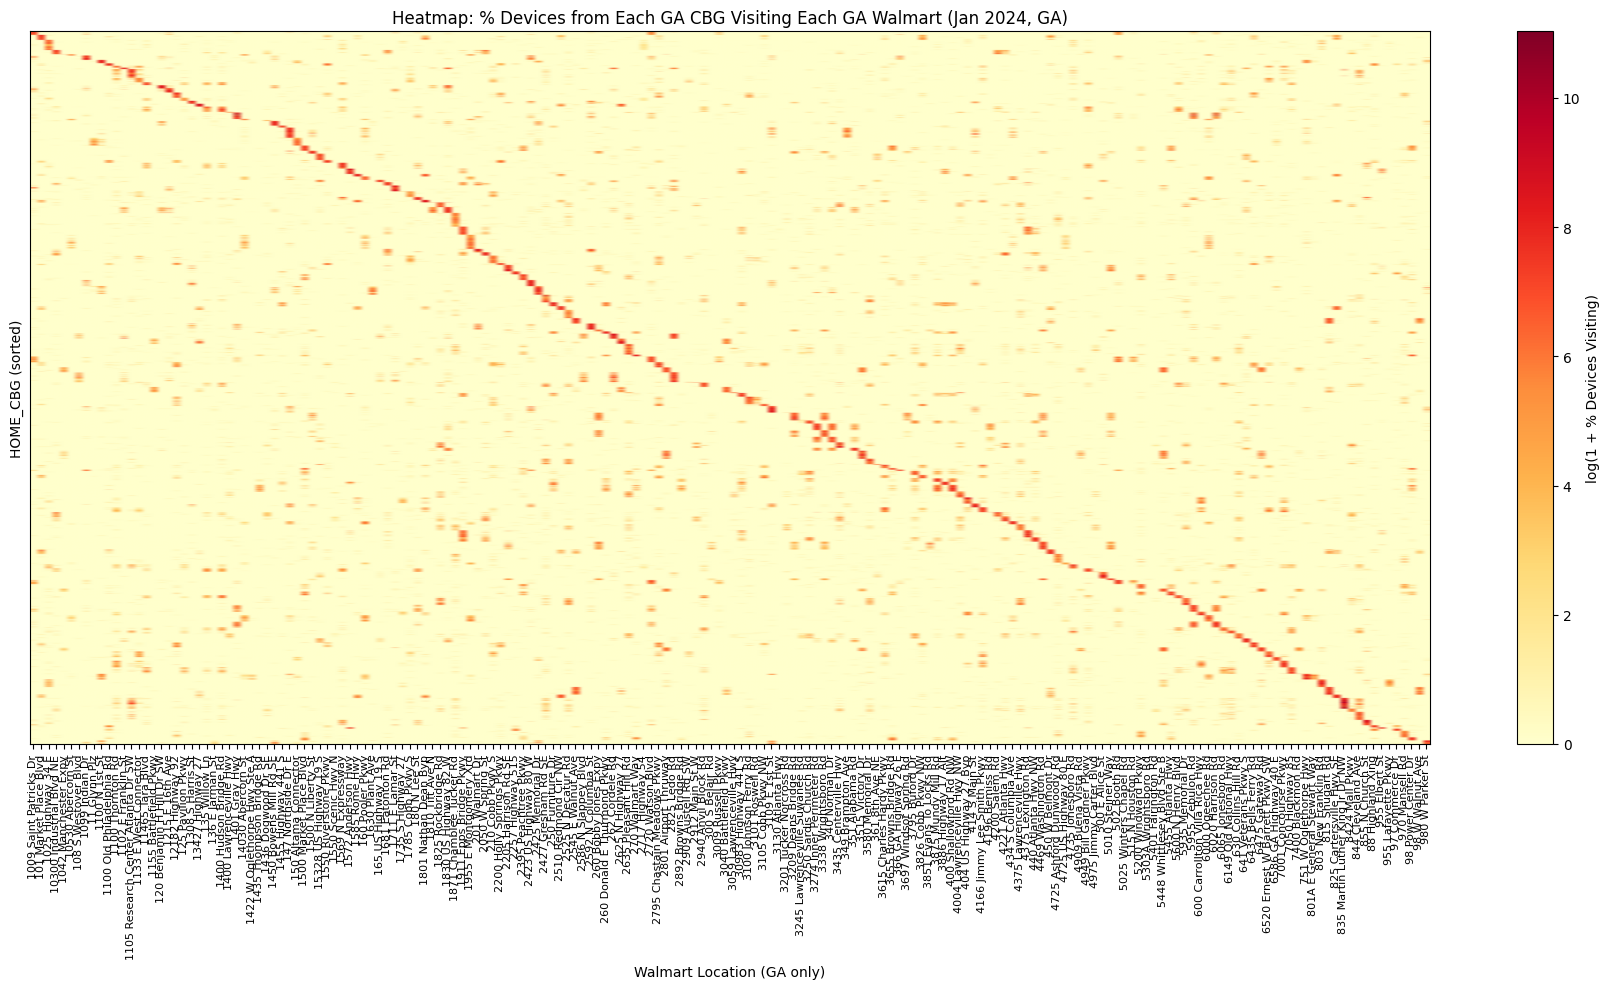

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Calculate % of resident devices from each HOME_CBG visiting each Walmart
merged['PERCENTAGE_VISITED'] = (merged['VISITOR_COUNT'] / merged['NUMBER_DEVICES_RESIDING']) * 100

# 2. Aggregate to ensure only one row per (HOME_CBG, STREET_ADDRESS)
pivot_df = (
    merged.groupby(['HOME_CBG', 'STREET_ADDRESS'], as_index=False)
    .agg({'PERCENTAGE_VISITED': 'sum'})
)

# 3. Pivot: rows = HOME_CBGs, columns = Walmarts, values = % visited
pivot = pivot_df.pivot(
    index='HOME_CBG',
    columns='STREET_ADDRESS',
    values='PERCENTAGE_VISITED'
).fillna(0)

# 4. (Optional) Sort CBGs by the Walmart with the highest % visiting for visual clusters
pivot['max_col'] = pivot.values.argmax(axis=1)
pivot_sorted = pivot.sort_values('max_col').drop(columns='max_col')

# 5. Plot the heatmap
plt.figure(figsize=(18, 10))
plt.imshow(np.log1p(pivot_sorted), aspect='auto', cmap='YlOrRd')
plt.colorbar(label="log(1 + % Devices Visiting)")
plt.xlabel("Walmart Location (GA only)")
plt.ylabel("HOME_CBG (sorted)")
plt.title("Heatmap: % Devices from Each GA CBG Visiting Each GA Walmart (Jan 2024, GA)")
plt.xticks(
    ticks=np.arange(len(pivot_sorted.columns)),
    labels=pivot_sorted.columns,
    rotation=90,
    fontsize=8
)
plt.yticks([], [])  # Hide y-tick labels (too many CBGs)
plt.tight_layout()
plt.show()

In [15]:
print("All unique Walmart addresses in heatmap columns:")
print(list(pivot_sorted.columns))

All unique Walmart addresses in heatmap columns:
['1009 Saint Patricks Dr', '101 Market Place Blvd', '1025 Highway 34 E', '10300 Industrial Blvd NE', '1042 Manchester Expy', '10530 Abercorn St', '108 S Westover Blvd', '1099 Indian Dr', '11 Glynn Plz', '1100 N 1st St', '1100 Old Philadelphia Rd', '1100 Thornton Rd', '1102 E Franklin St', '1105 Research Center Atlanta Dr SW', '1133 E West Connector', '11465 Tara Blvd', '1155 Battlefield Pkwy', '120 Benjamin H Hill Dr SW', '1215 E 16th Ave', '12182 Highway 92', '125 Pavilion Pkwy', '1308 S Harris St', '13427 Highway 27', '135 Willow Ln', '136 E Jarman St', '1400 Hudson Bridge Rd', '1400 Lawrenceville Hwy', '1401 Gray Hwy', '14030 Abercorn St', '1422 W Oglethorpe Hwy Ste A', '1435 Thompson Bridge Rd', '1436 Dogwood Dr SE', '1450 Bowens Mill Rd SE', '1455 Highway 441 S', '147 Northside Dr E', '150 Altama Connector', '1500 Market Place Blvd', '1500 N Liberty St', '15328 US Highway 19 S', '1550 Riverstone Pkwy', '1550 Scenic Hwy N', '1569 N E

In [ ]:
import sys
from pathlib import Path
import pyarrow.dataset as ds
import re
import pandas as pd

# Import your config paths as before
sys.path.append(str(Path.cwd().parent))
from config import PATH_KIOSK_USER_PATTERNS_FOLDER, PATH_KIOSK_USER_PATTERNS_REPO

# Load the Advan Research monthly patterns dataset
kupdat03 = ds.dataset(
    PATH_KIOSK_USER_PATTERNS_FOLDER / "working/processed/kupdat03_advan research monthly patterns",
    format="parquet",
    partitioning=["YEAR", "MONTH"]
)

# Get all relevant columns as a DataFrame (be patient, this may take a minute)
filtered_df = kupdat03.to_table(
    columns=[
        "HOME_CBG", "VISITOR_COUNT", "STREET_ADDRESS",
        "LATITUDE", "LONGITUDE", "REGION", "YEAR", "MONTH"
    ]
).to_pandas()

# Extract YEAR and MONTH as integers (handles "YEAR=2023" type strings)
filtered_df["YEAR"] = filtered_df["YEAR"].astype(str).str.extract(r'(\d{4})').astype(int)
filtered_df["MONTH"] = filtered_df["MONTH"].astype(str).str.extract(r'(\d{1,2})').astype(int)

# Filter for years and region of interest (GA, 2022–2025)
filtered_df = filtered_df[
    (filtered_df["YEAR"].isin([2022, 2023, 2024, 2025])) &
    (filtered_df["REGION"] == "GA")
].copy()

# Filter for only Walmart-related locations 
selected_locations = [
    "Walmart Pharmacy", "Walmart Supercenter", "Walmart", "Walmart Center", "Walmart Neighborhood Market"
]
pattern = re.compile(r'(?=.*Walmart)(?=.*Supercenter)', re.IGNORECASE)
def filter_location(loc):
    if loc in selected_locations:
        return True
    elif pattern.search(str(loc)):
        return True
    return False
all_locations = filtered_df['STREET_ADDRESS'].unique().tolist()
locations_to_keep = [loc for loc in all_locations if filter_location(loc)]
filtered_df = filtered_df[filtered_df['STREET_ADDRESS'].isin(locations_to_keep)]

# Ensure VISITOR_COUNT is numeric
filtered_df["VISITOR_COUNT"] = pd.to_numeric(filtered_df["VISITOR_COUNT"], errors="coerce")

# Create YearRange column
filtered_df['YearRange'] = filtered_df['YEAR'].apply(
    lambda y: '2022-2023' if y in [2022, 2023] else '2024-2025'
)

# Group and compute average monthly visits
result = (
    filtered_df.groupby(
        ['HOME_CBG', 'STREET_ADDRESS', 'LATITUDE', 'LONGITUDE', 'YearRange'],
        as_index=False
    )
    .agg(Average_Visits=('VISITOR_COUNT', 'mean'))
)

# Show result
print(result.head())
print(result.shape)

       HOME_CBG                  STREET_ADDRESS   LATITUDE  LONGITUDE  \
0  010010206001  1025 Ga-34 Walmart Supercenter  33.393687  -84.74375   
1  010010207001  1025 Ga-34 Walmart Supercenter  33.393687  -84.74375   
2  010010209003  1025 Ga-34 Walmart Supercenter  33.393687  -84.74375   
3  010030104003  1025 Ga-34 Walmart Supercenter  33.393687  -84.74375   
4  010030107031  1025 Ga-34 Walmart Supercenter  33.393687  -84.74375   

   YearRange  Average_Visits  
0  2024-2025             4.0  
1  2024-2025             4.0  
2  2022-2023             7.0  
3  2024-2025             6.0  
4  2022-2023             7.0  
(4290, 6)


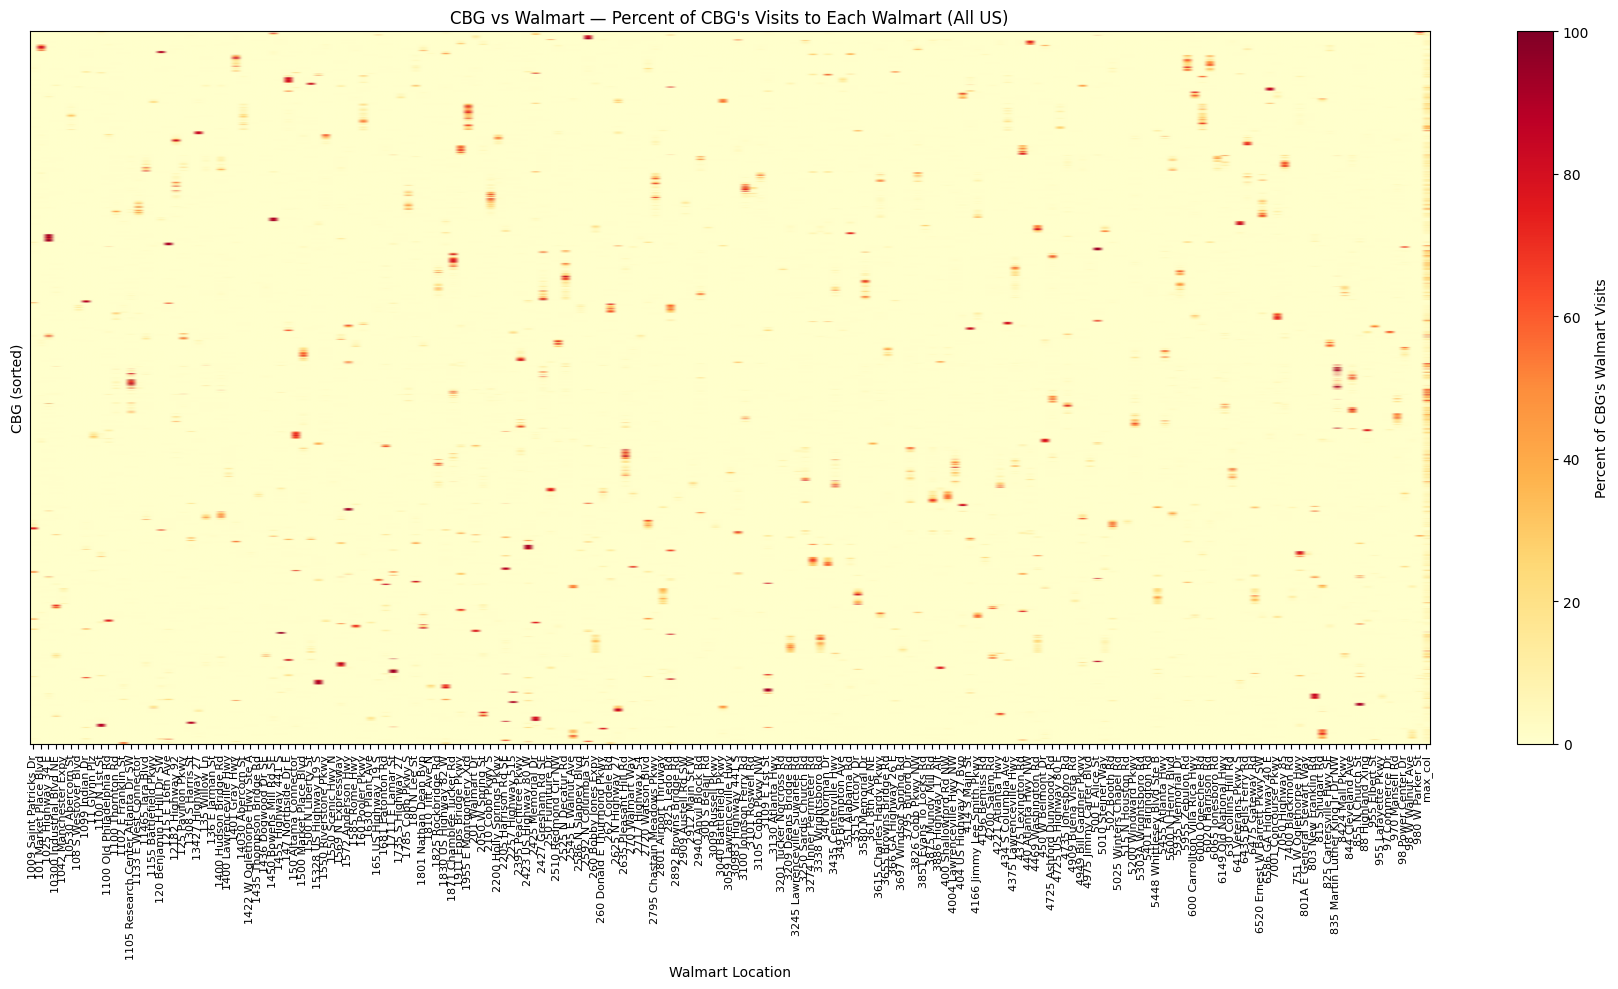

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Assume `pivot` is your CBG x Walmart DataFrame with raw visit counts
pivot_pct = pivot.div(pivot.sum(axis=1), axis=0) * 100  # Convert to row percentages

# Optionally replace NaN (if a CBG has all zero visits) with 0
pivot_pct = pivot_pct.fillna(0)

# Plot heatmap with new scale (0–100%)
plt.figure(figsize=(18, 10))
plt.imshow(pivot_pct, aspect='auto', cmap='YlOrRd', vmin=0, vmax=100)
plt.colorbar(label="Percent of CBG's Walmart Visits")
plt.xlabel("Walmart Location")
plt.ylabel("CBG (sorted)")
plt.title("CBG vs Walmart — Percent of CBG's Visits to Each Walmart (All US)")
plt.xticks(ticks=np.arange(len(pivot_pct.columns)), labels=pivot_pct.columns, rotation=90, fontsize=8)
plt.yticks([], [])  # Too many CBGs to label
plt.tight_layout()
plt.show()